In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

stats = pd.read_csv('/content/drive/My Drive/Personal Projects/2025BaseballSavant_1.csv')
map = pd.read_csv('/content/drive/My Drive/Personal Projects/SFBB Player ID Map - PLAYERIDMAP.csv')

Mounted at /content/drive


In [ ]:
stats = stats.merge(map[['MLBID', 'TEAM']], left_on='player_id', right_on='MLBID', how='left')

In [ ]:
stats['Colorado'] = np.where(stats['TEAM'] == 'COL', "Colorado", "Other")

In [ ]:
continous_features = ["player_age", "ab", "pa", "hit", "single", "double", "triple", "home_run", "strikeout",
                      "walk", "k_percent", "bb_percent", "batting_avg", "slg_percent", "on_base_percent", "on_base_plus_slg",
                      "xba", "xslg", "woba", "xwoba", "xobp", "xiso", "avg_swing_speed", "fast_swing_rate", "blasts_contact",
                      "blasts_swing", "squared_up_contact", "squared_up_swing", "avg_swing_length", "swords", "exit_velocity_avg",
                      "launch_angle_avg", "sweet_spot_percent", "barrel_batted_rate", "hard_hit_percent", "hard_hit_percent",
                      "avg_best_speed", "avg_hyper_speed", "z_swing_percent", "z_swing_miss_percent", "oz_swing_percent", "oz_swing_miss_percent",
                      "out_zone_swing_miss", "out_zone_swing", "whiff_percent", "swing_percent"]

In [ ]:
cluster_features = ["k_percent", "on_base_plus_slg", "z_swing_percent", "z_swing_miss_percent", "oz_swing_percent", "oz_swing_miss_percent",]

X = stats[cluster_features].dropna()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1, 21):
  kmeans = KMeans(n_clusters=i, max_iter=300, random_state=123)
  kmeans.fit(X_scaled)
  inertias.append(kmeans.inertia_)

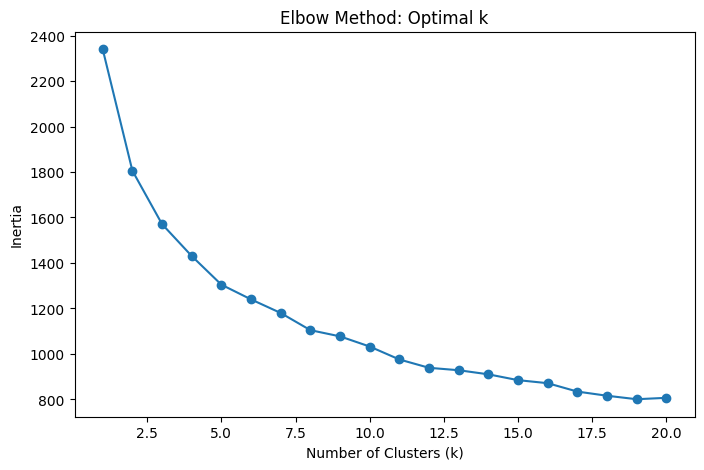

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method: Optimal k')
plt.show()

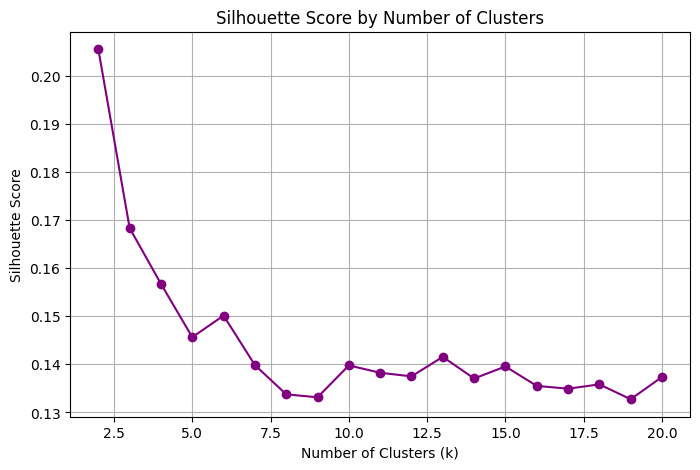

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 21):  # silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 21), silhouette_scores, marker='o', color='purple')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Number of Clusters')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
X['cluster6'] = kmeans.fit_predict(X_scaled)

stats_kmeans = stats.loc[X.index].copy()
stats_kmeans['cluster6'] = X['cluster6']

In [ ]:
stats_kmeans.head()

,"last_name, first_name",player_id,year,player_age,ab,pa,hit,single,double,triple,...,oz_swing_percent,oz_swing_miss_percent,out_zone_swing_miss,out_zone_swing,whiff_percent,swing_percent,MLBID,TEAM,Colorado,cluster6
0,"Goodman, Hunter",696100,2025,25,43,48,9,4,3,0,...,47.7,58.5,24,41,37.0,61.7,696100.0,COL,Colorado,4
1,"DeJong, Paul",657557,2025,31,48,50,9,5,4,0,...,34.0,42.4,14,33,30.0,58.8,657557.0,WAS,Other,1
2,"Tovar, Ezequiel",678662,2025,23,58,61,14,9,4,1,...,36.3,46.3,19,41,22.9,55.7,678662.0,COL,Colorado,4
3,"Muncy, Max",691777,2025,22,50,51,9,5,3,0,...,30.6,65.4,17,26,34.0,50.3,691777.0,OAK,Other,2
4,"Butler, Lawrence",671732,2025,24,57,67,16,11,4,0,...,23.9,52.9,18,34,28.9,44.5,671732.0,OAK,Other,3


In [ ]:
cluster_summary = stats_kmeans.groupby('cluster6')[cluster_features].mean().round(2)
print(cluster_summary)

          k_percent  on_base_plus_slg  z_swing_percent  z_swing_miss_percent  \
cluster6                                                                       
0             13.94              0.69            59.77                 10.32   
1             33.03              0.57            72.99                 30.30   
2             35.56              0.56            60.94                 21.80   
3             24.34              0.71            63.07                 18.30   
4             22.56              0.51            71.51                 14.70   
5             16.01              0.92            71.95                 15.32   

          oz_swing_percent  oz_swing_miss_percent  
cluster6                                           
0                    24.80                  28.84  
1                    30.74                  56.37  
2                    24.15                  67.39  
3                    24.49                  47.60  
4                    39.15                  45.

<ipython-input-14-529234e4de40>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster6', y=feature, palette='Set3')


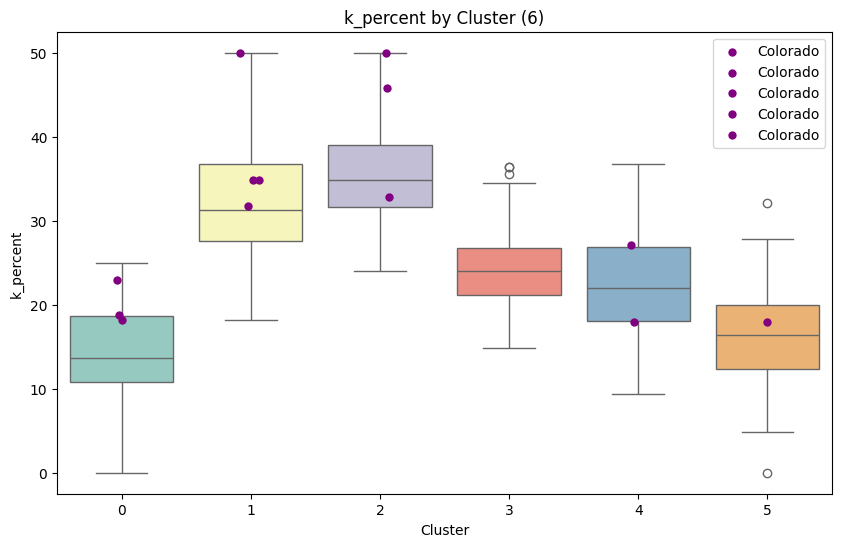

<ipython-input-14-529234e4de40>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster6', y=feature, palette='Set3')


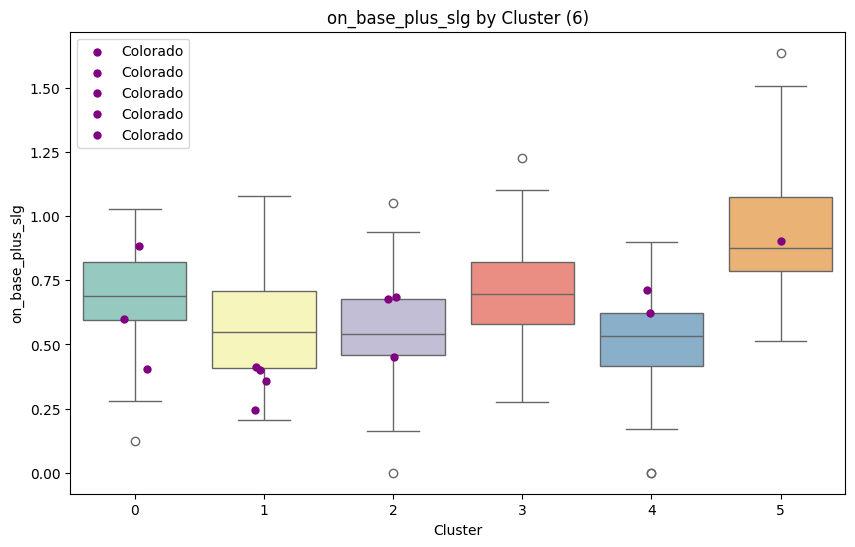

<ipython-input-14-529234e4de40>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster6', y=feature, palette='Set3')


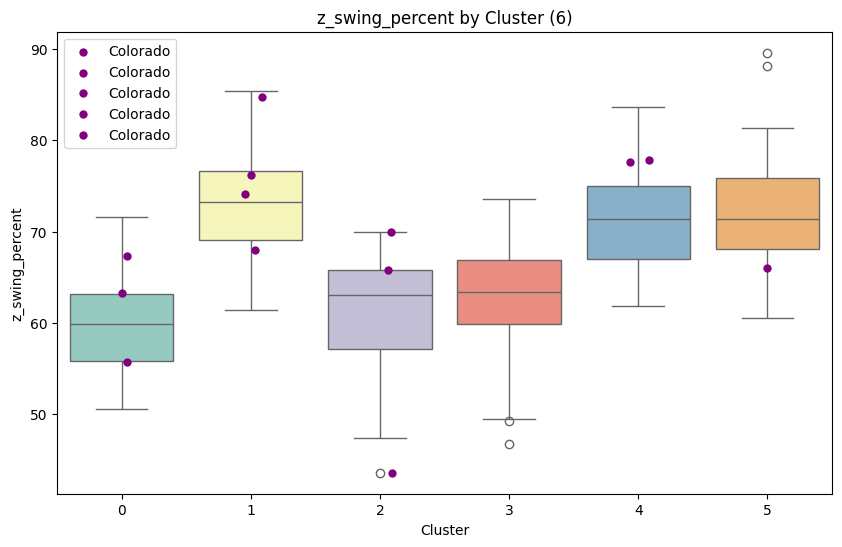

<ipython-input-14-529234e4de40>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster6', y=feature, palette='Set3')


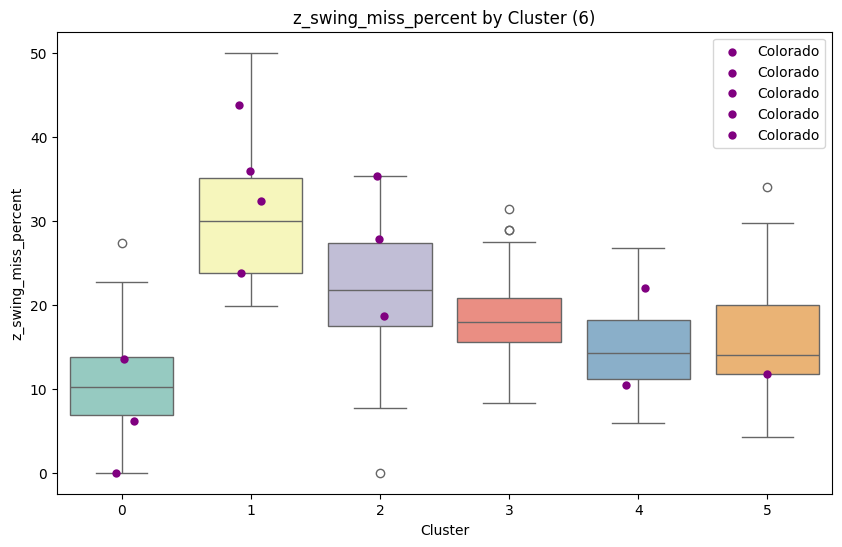

<ipython-input-14-529234e4de40>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster6', y=feature, palette='Set3')


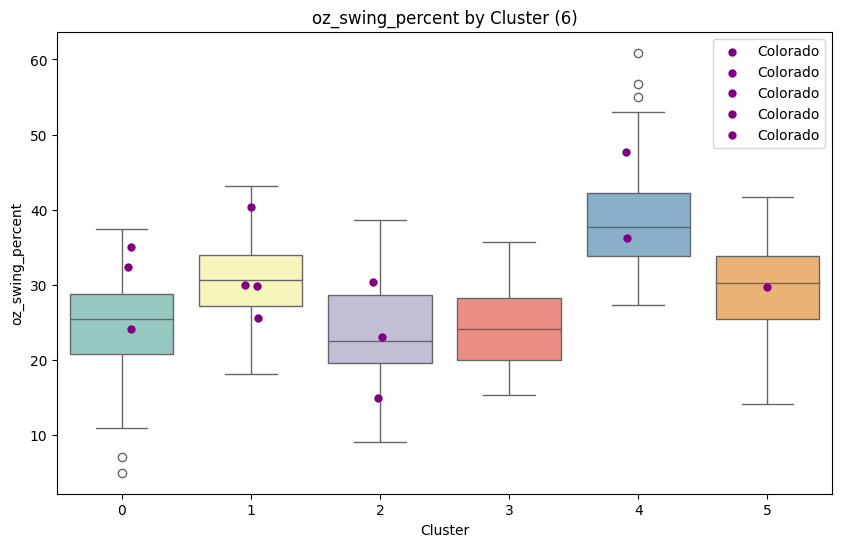

<ipython-input-14-529234e4de40>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster6', y=feature, palette='Set3')


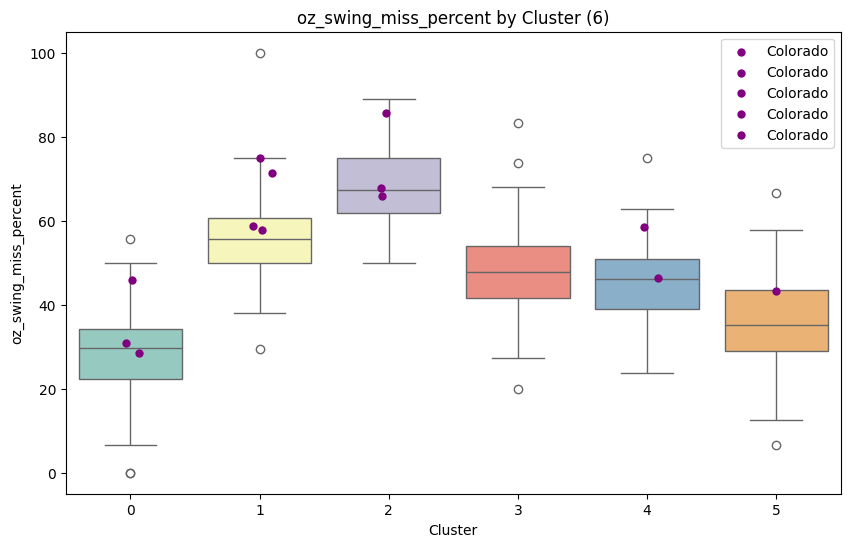

In [ ]:
stats_kmeans['Colorado'] = stats_kmeans['TEAM'].apply(lambda x: x == 'COL')

for feature in cluster_features:
    plt.figure(figsize=(10, 6))

    sns.boxplot(data=stats_kmeans, x='cluster6', y=feature, palette='Set3')
    sns.stripplot(
        data=stats_kmeans[stats_kmeans['Colorado']],
        x='cluster6', y=feature, color='purple', size=6, jitter=True, label='Colorado'
    )

    plt.title(f'{feature} by Cluster (6)')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

<ipython-input-15-83e9abbc17b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=stats_kmeans, x='cluster6', y=feature, palette='Pastel2', inner='quartile')


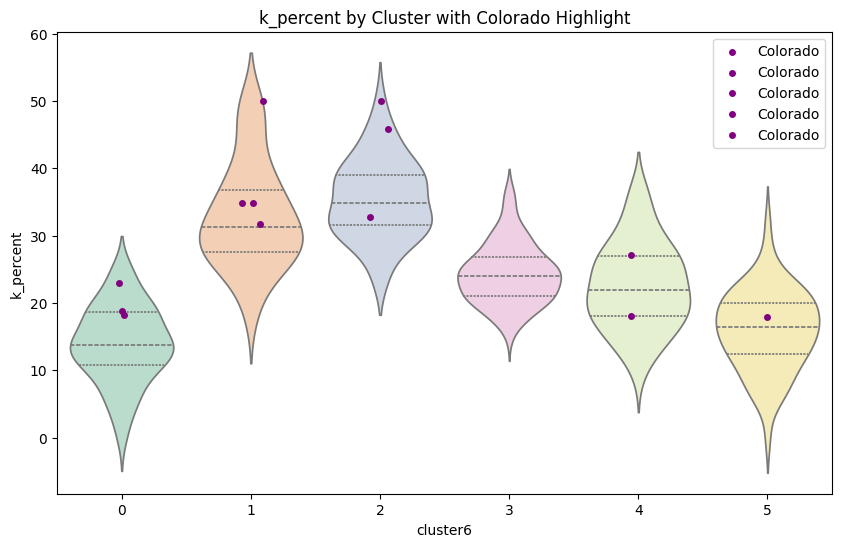

<ipython-input-15-83e9abbc17b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=stats_kmeans, x='cluster6', y=feature, palette='Pastel2', inner='quartile')


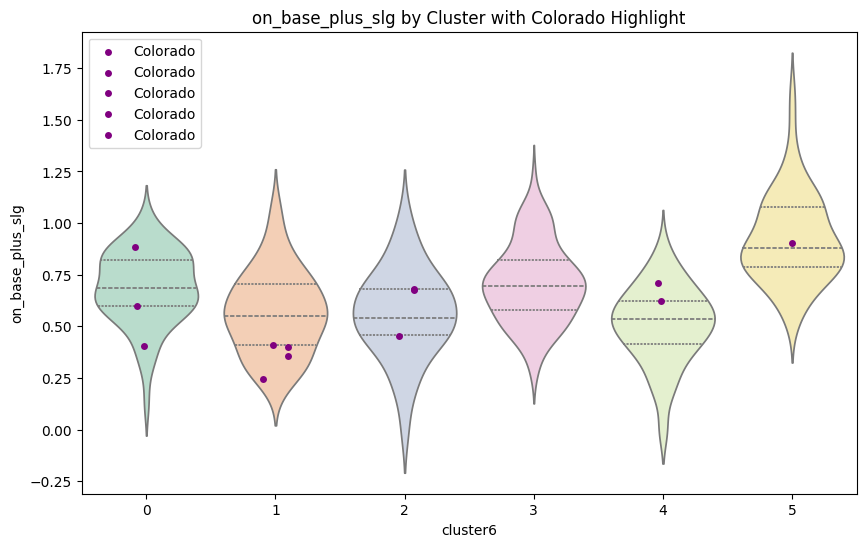

<ipython-input-15-83e9abbc17b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=stats_kmeans, x='cluster6', y=feature, palette='Pastel2', inner='quartile')


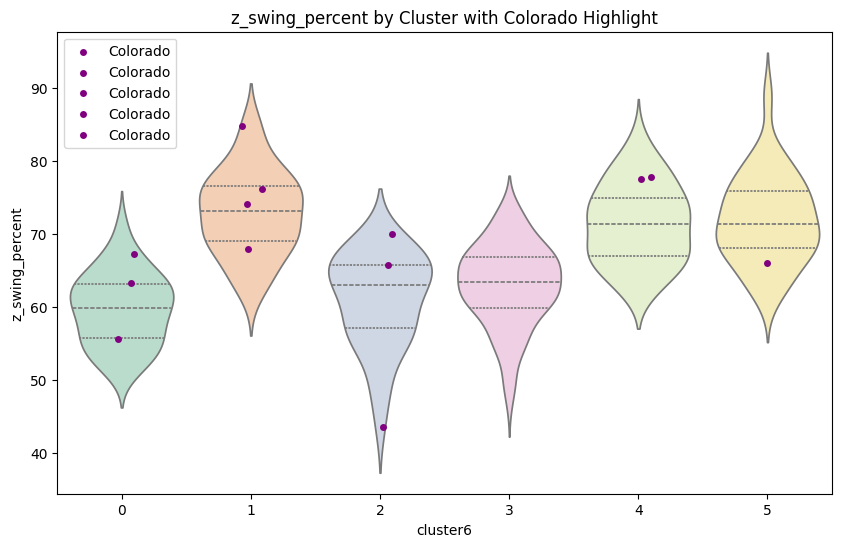

<ipython-input-15-83e9abbc17b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=stats_kmeans, x='cluster6', y=feature, palette='Pastel2', inner='quartile')


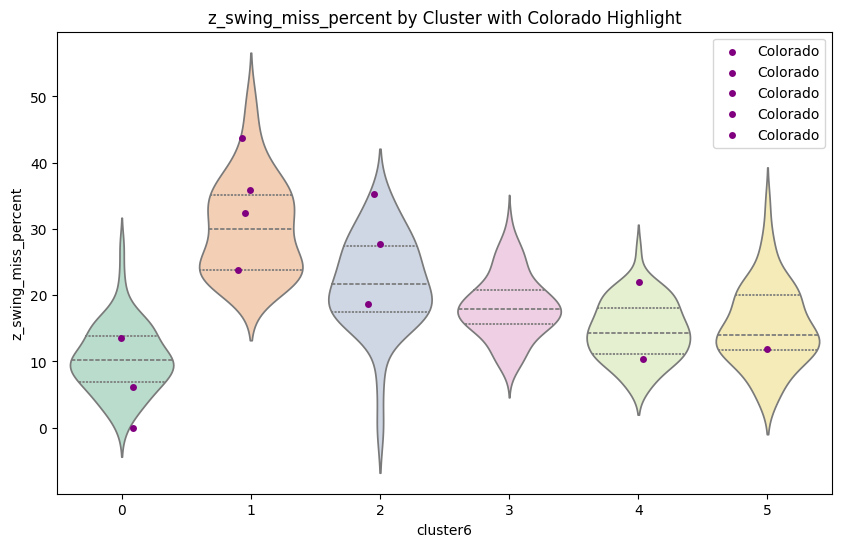

<ipython-input-15-83e9abbc17b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=stats_kmeans, x='cluster6', y=feature, palette='Pastel2', inner='quartile')


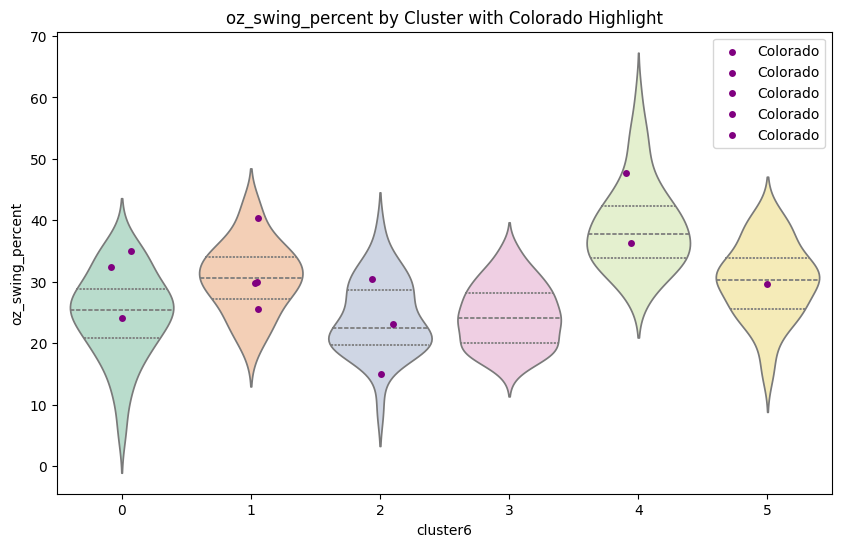

<ipython-input-15-83e9abbc17b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=stats_kmeans, x='cluster6', y=feature, palette='Pastel2', inner='quartile')


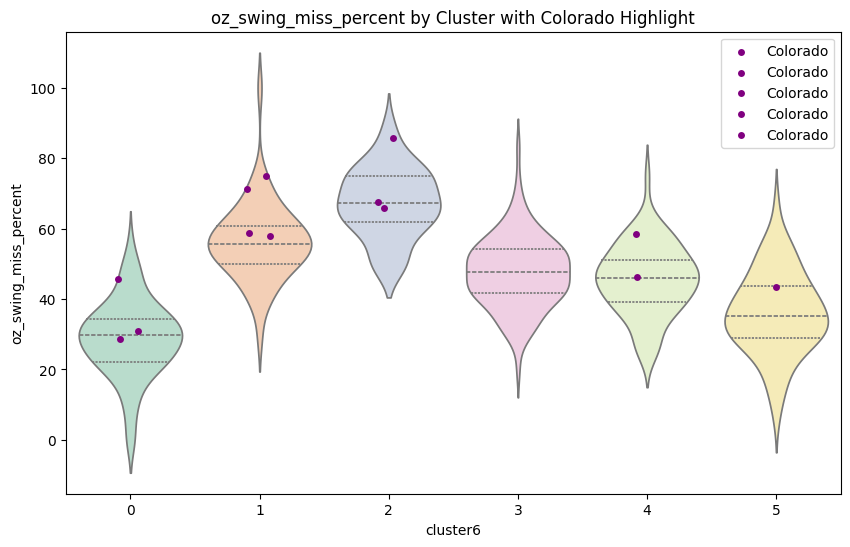

In [ ]:
for feature in cluster_features:
    plt.figure(figsize=(10, 6))

    sns.violinplot(data=stats_kmeans, x='cluster6', y=feature, palette='Pastel2', inner='quartile')
    sns.stripplot(
        data=stats_kmeans[stats_kmeans['Colorado']],
        x='cluster6', y=feature, color='purple', size=5, jitter=True, label='Colorado'
    )

    plt.title(f'{feature} by Cluster with Colorado Highlight')
    plt.legend()
    plt.show()

<ipython-input-16-e25fdb963c3b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster5', y=feature, palette='Set3')


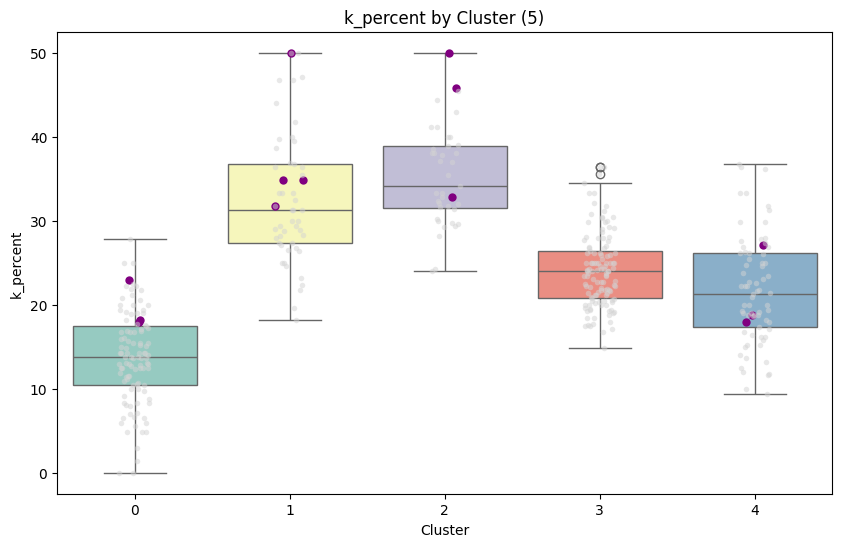

<ipython-input-16-e25fdb963c3b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster5', y=feature, palette='Set3')


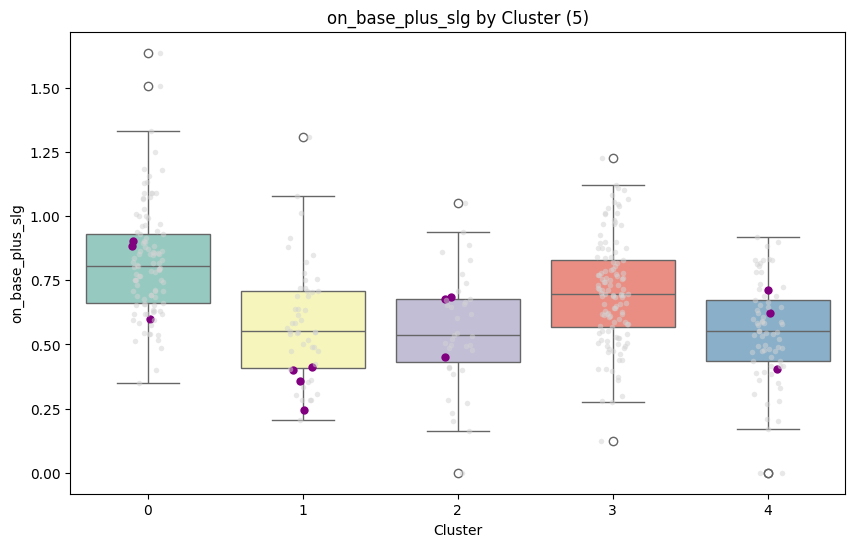

<ipython-input-16-e25fdb963c3b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster5', y=feature, palette='Set3')


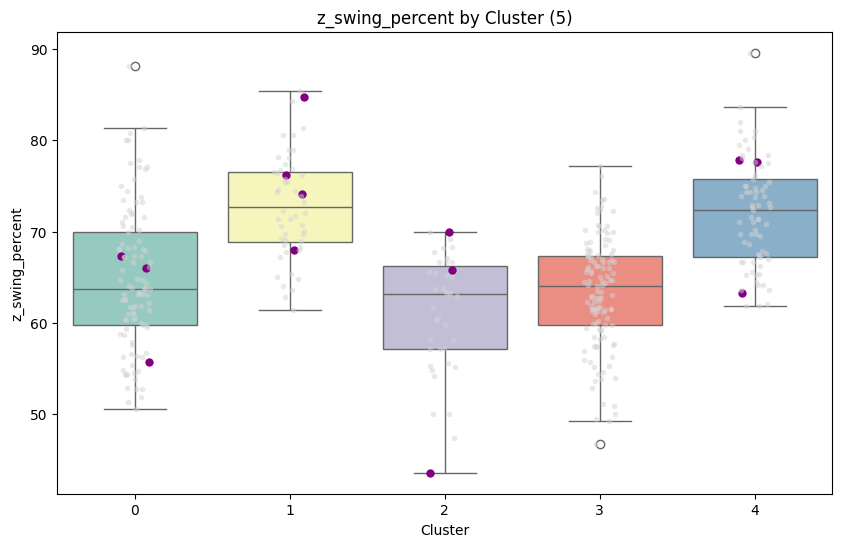

<ipython-input-16-e25fdb963c3b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster5', y=feature, palette='Set3')


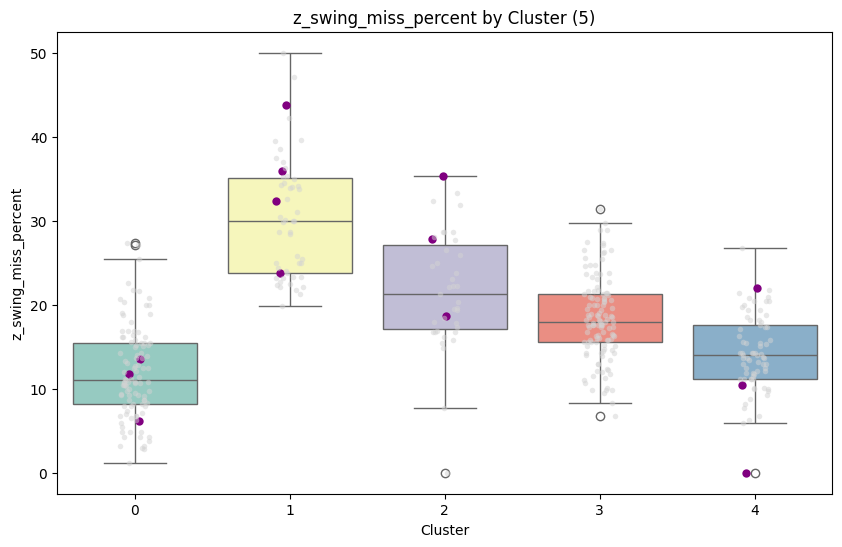

<ipython-input-16-e25fdb963c3b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster5', y=feature, palette='Set3')


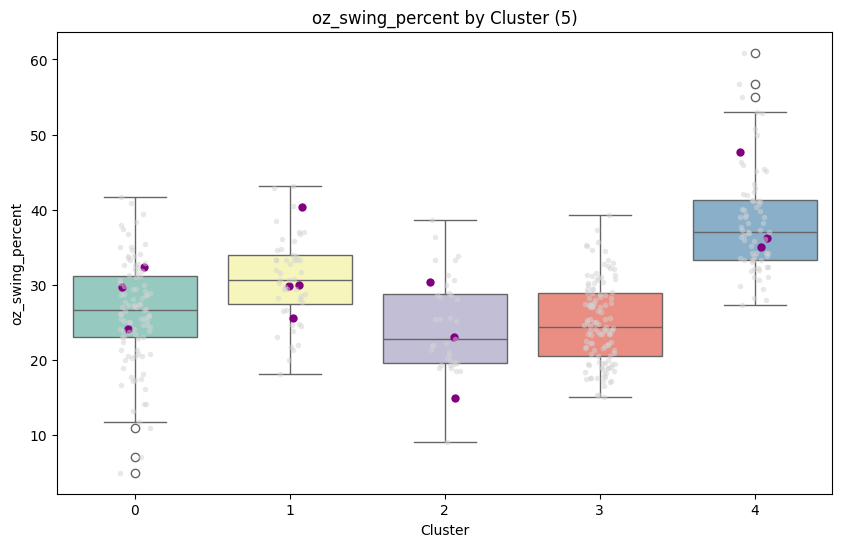

<ipython-input-16-e25fdb963c3b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster5', y=feature, palette='Set3')


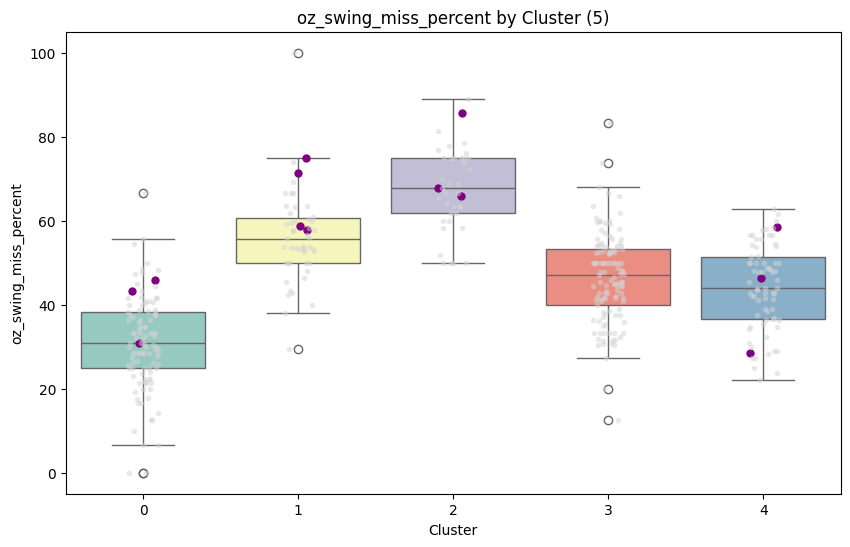

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
X['cluster5'] = kmeans.fit_predict(X_scaled)

stats_kmeans = stats.loc[X.index].copy()
stats_kmeans['cluster5'] = X['cluster5']


stats_kmeans['Colorado'] = stats_kmeans['TEAM'].apply(lambda x: x == 'COL')

for feature in cluster_features:
    plt.figure(figsize=(10, 6))

    sns.boxplot(data=stats_kmeans, x='cluster5', y=feature, palette='Set3')
    sns.stripplot(
        data=stats_kmeans[stats_kmeans['Colorado']],
        x='cluster5', y=feature, color='purple', size=6, jitter=True
    )
    sns.stripplot(
        data=stats_kmeans[~stats_kmeans['Colorado']],
        x='cluster5', y=feature, color='lightgray', size=4, jitter=True, alpha=0.5
    )

    plt.title(f'{feature} by Cluster (5)')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

<ipython-input-17-a94a9571dc59>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster4', y=feature, palette='Set3')


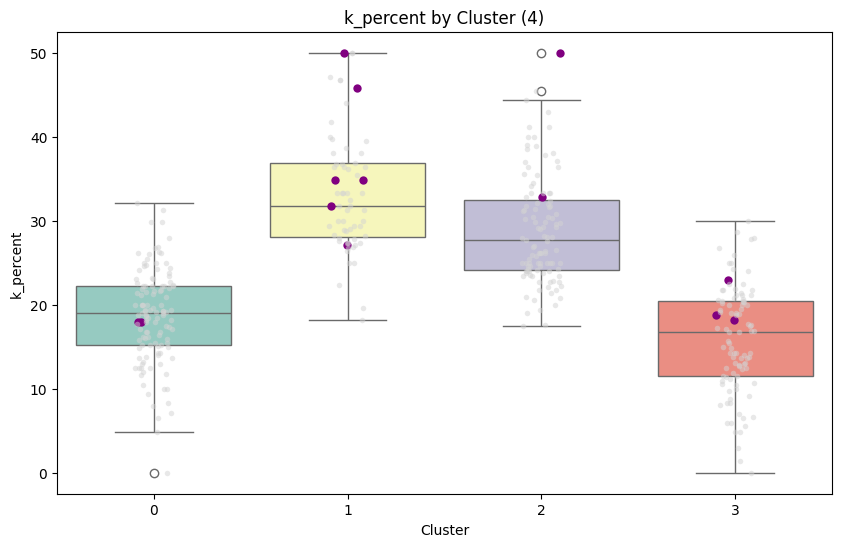

<ipython-input-17-a94a9571dc59>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster4', y=feature, palette='Set3')


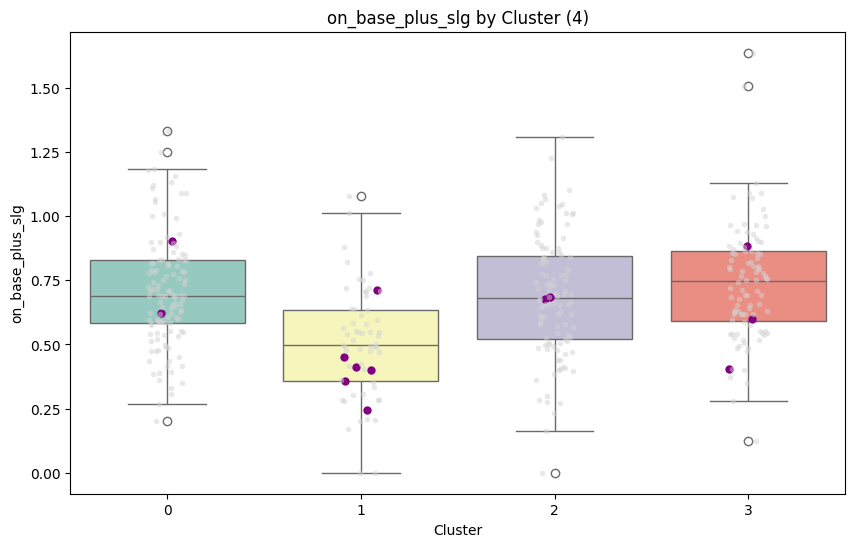

<ipython-input-17-a94a9571dc59>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster4', y=feature, palette='Set3')


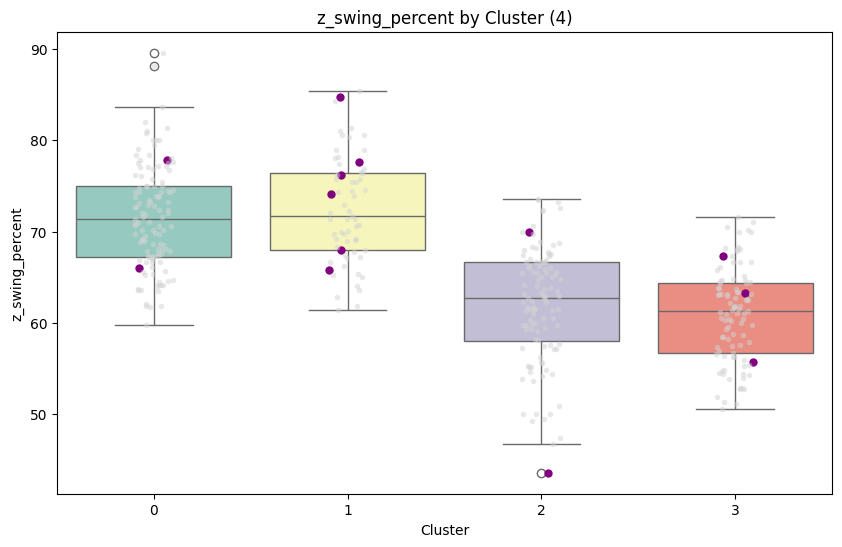

<ipython-input-17-a94a9571dc59>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster4', y=feature, palette='Set3')


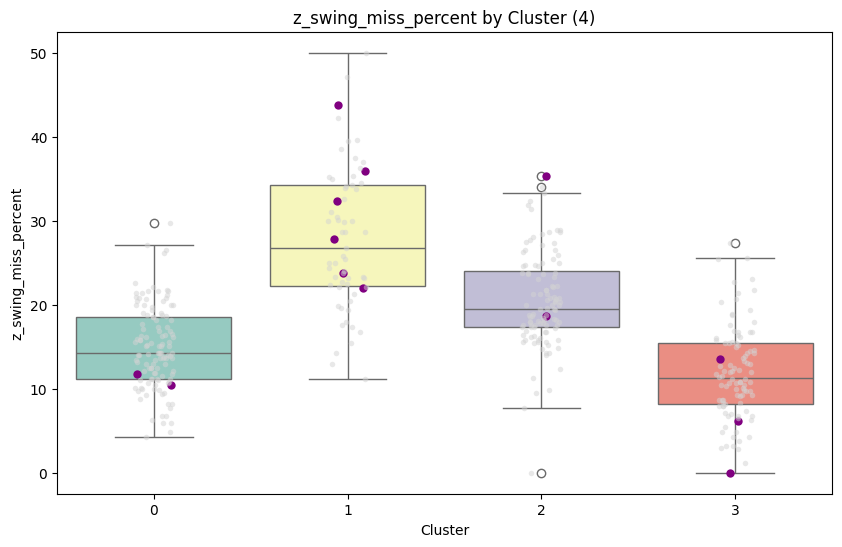

<ipython-input-17-a94a9571dc59>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster4', y=feature, palette='Set3')


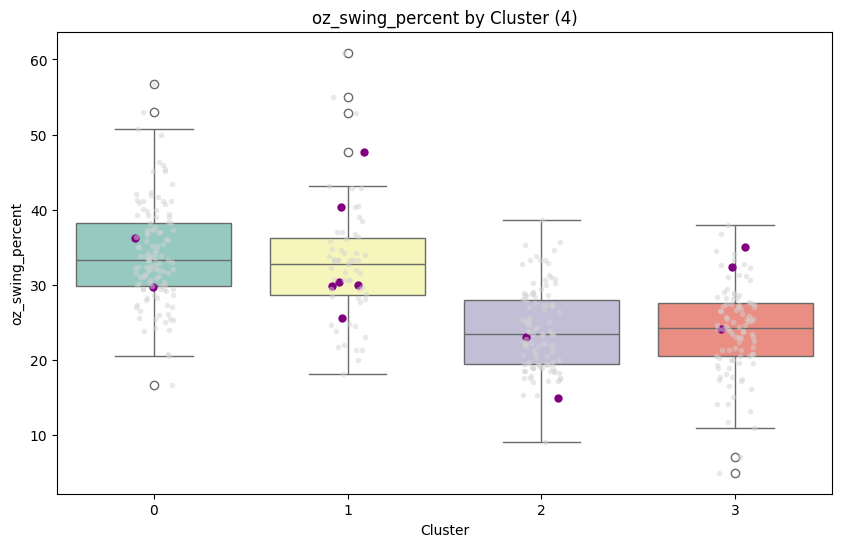

<ipython-input-17-a94a9571dc59>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_kmeans, x='cluster4', y=feature, palette='Set3')


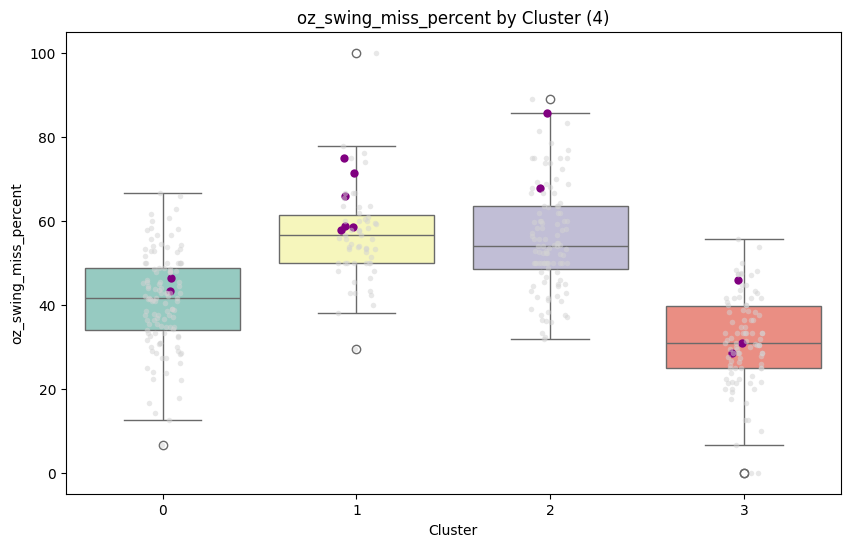

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
X['cluster4'] = kmeans.fit_predict(X_scaled)

stats_kmeans = stats.loc[X.index].copy()
stats_kmeans['cluster4'] = X['cluster4']


stats_kmeans['Colorado'] = stats_kmeans['TEAM'].apply(lambda x: x == 'COL')

for feature in cluster_features:
    plt.figure(figsize=(10, 6))

    sns.boxplot(data=stats_kmeans, x='cluster4', y=feature, palette='Set3')
    sns.stripplot(
        data=stats_kmeans[stats_kmeans['Colorado']],
        x='cluster4', y=feature, color='purple', size=6, jitter=True
    )
    sns.stripplot(
        data=stats_kmeans[~stats_kmeans['Colorado']],
        x='cluster4', y=feature, color='lightgray', size=4, jitter=True, alpha=0.5
    )

    plt.title(f'{feature} by Cluster (4)')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

<ipython-input-18-62a4d954075e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=stats_kmeans, x='cluster4', y=feature, palette='Set2', inner='quartile')
<ipython-input-18-62a4d954075e>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


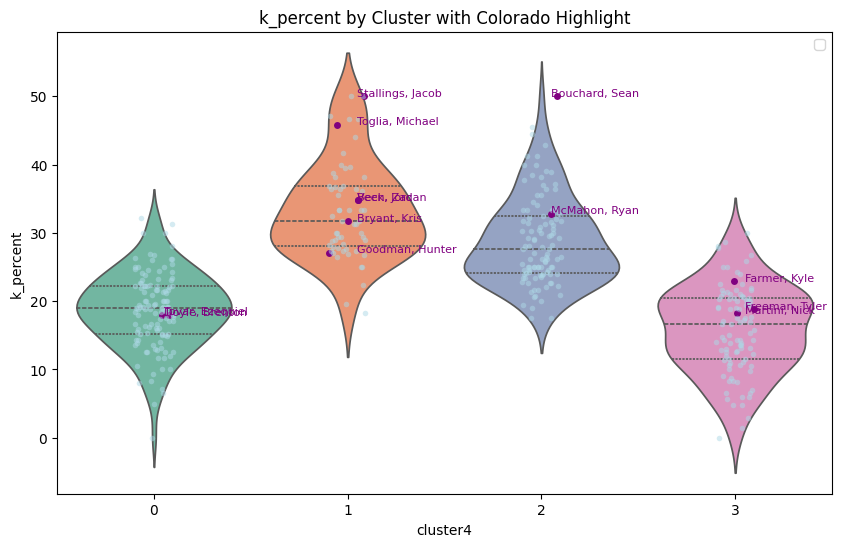

<ipython-input-18-62a4d954075e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=stats_kmeans, x='cluster4', y=feature, palette='Set2', inner='quartile')
<ipython-input-18-62a4d954075e>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


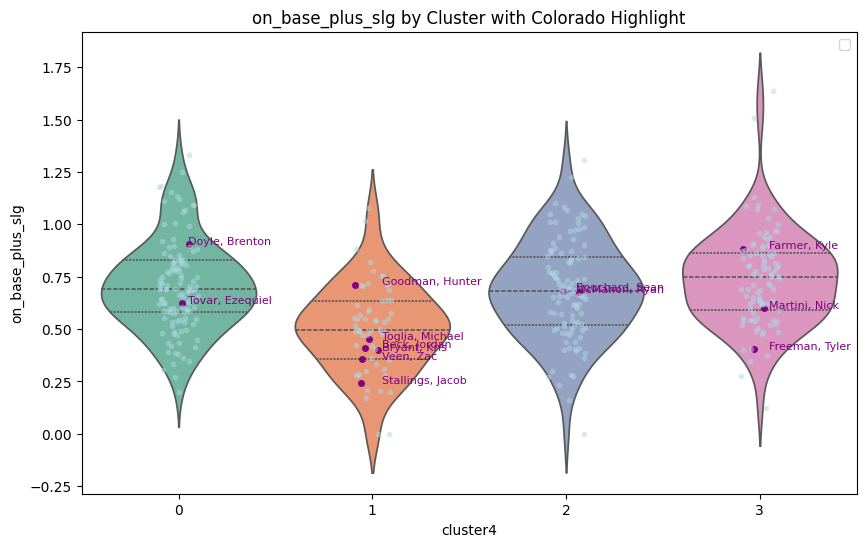

<ipython-input-18-62a4d954075e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=stats_kmeans, x='cluster4', y=feature, palette='Set2', inner='quartile')
<ipython-input-18-62a4d954075e>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


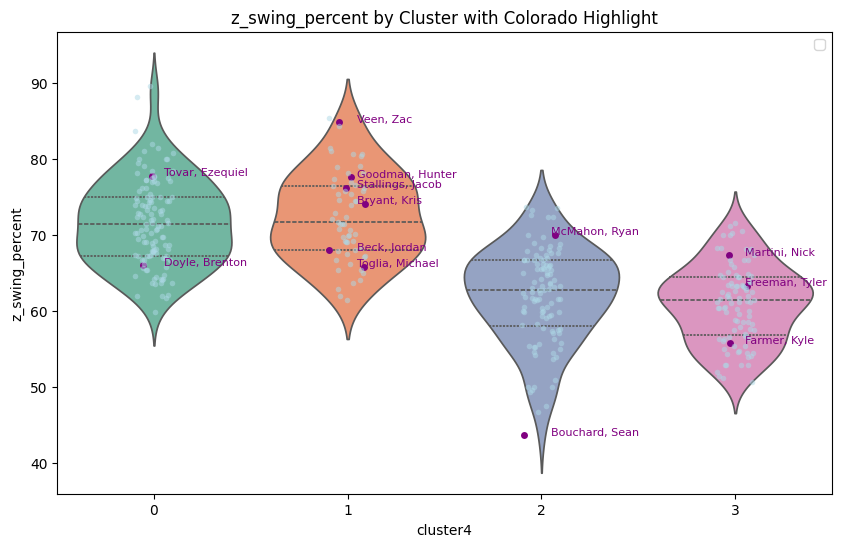

<ipython-input-18-62a4d954075e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=stats_kmeans, x='cluster4', y=feature, palette='Set2', inner='quartile')
<ipython-input-18-62a4d954075e>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


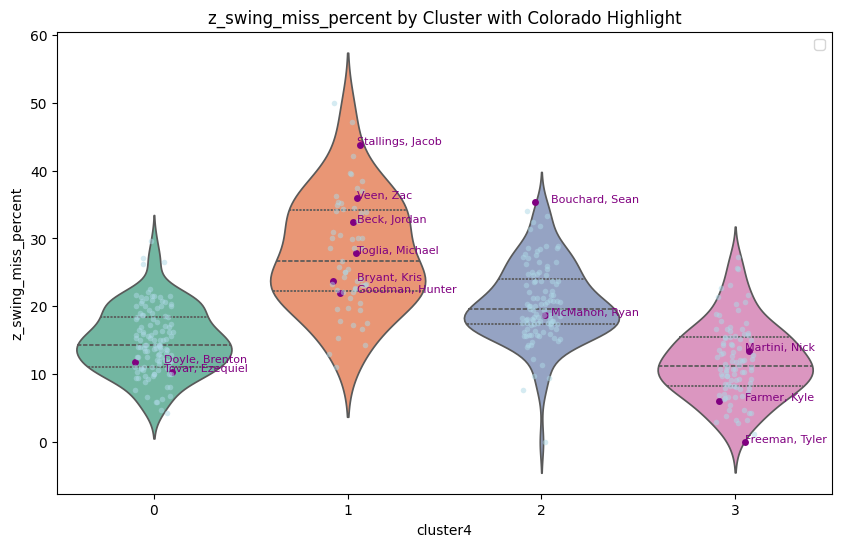

<ipython-input-18-62a4d954075e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=stats_kmeans, x='cluster4', y=feature, palette='Set2', inner='quartile')
<ipython-input-18-62a4d954075e>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


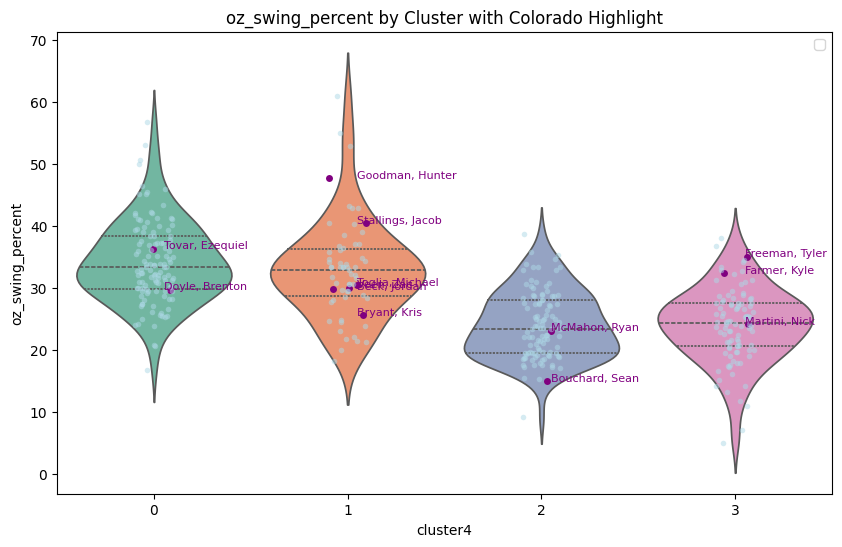

<ipython-input-18-62a4d954075e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=stats_kmeans, x='cluster4', y=feature, palette='Set2', inner='quartile')
<ipython-input-18-62a4d954075e>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


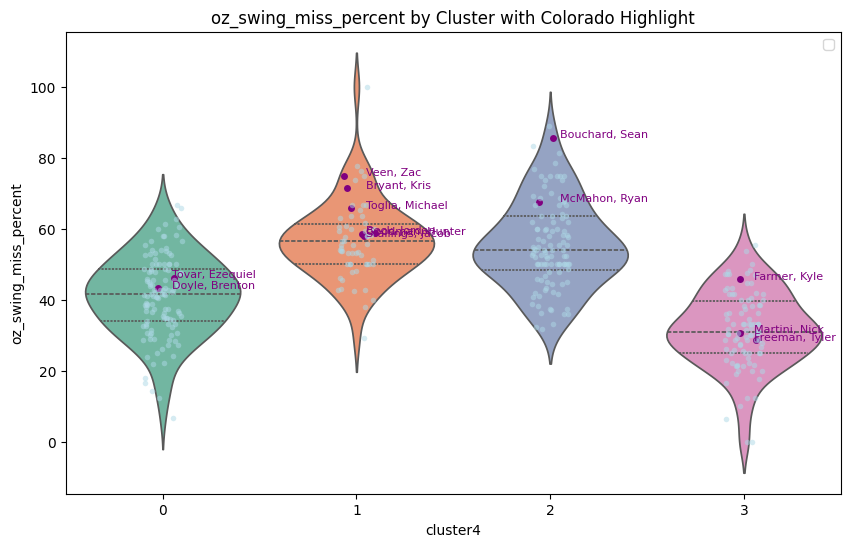

In [ ]:
for feature in cluster_features:
    plt.figure(figsize=(10, 6))

    sns.violinplot(data=stats_kmeans, x='cluster4', y=feature, palette='Set2', inner='quartile')
    sns.stripplot(
        data=stats_kmeans[stats_kmeans['Colorado']],
        x='cluster4', y=feature, color='purple', size=5, jitter=True
    )
    col_players = stats_kmeans[stats_kmeans['Colorado']]
    sns.stripplot(
        data=stats_kmeans[~stats_kmeans['Colorado']],
        x='cluster4', y=feature, color='lightblue', size=4, jitter=True, alpha=0.5
    )
    # Add player names as annotations
    for i, row in col_players.iterrows():
        plt.text(
            x=row['cluster4'] + 0.05,
            y=row[feature],
            s=row['last_name, first_name'],      # make sure 'player_name' exists in your DataFrame
            fontsize=8,
            color='purple'
        )

    plt.title(f'{feature} by Cluster with Colorado Highlight')
    plt.legend()
    plt.show()

In [ ]:
col_players = stats_kmeans[stats_kmeans['Colorado']]

<ipython-input-20-c9b705ecb45d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


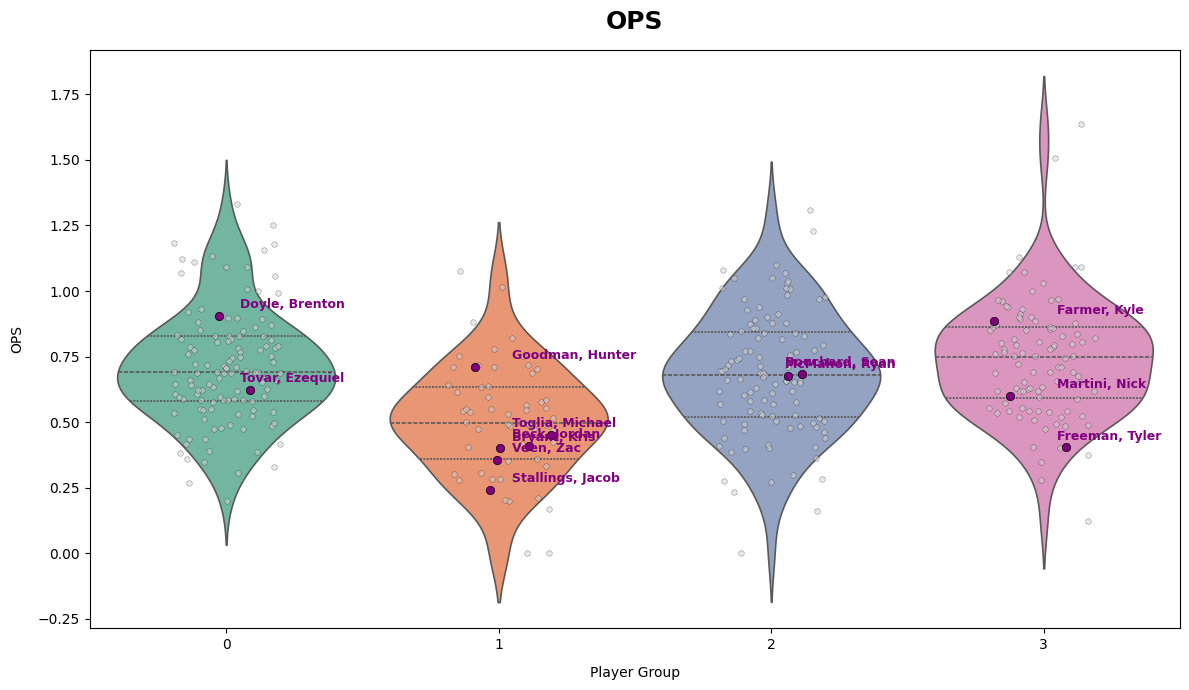

In [ ]:
plt.figure(figsize=(12, 7))
plt.grid(axis='y', visible=False)

feature = "on_base_plus_slg"

# Violin plot
sns.violinplot(
    data=stats_kmeans,
    x='cluster4',
    y=feature,
    palette='Set2',
    inner='quartile',
    linewidth=1.2
)

# Grey dots = non-Colorado
sns.stripplot(
    data=stats_kmeans[~stats_kmeans['Colorado']],
    x='cluster4',
    y=feature,
    color='lightgray',
    size=4,
    jitter=0.2,
    alpha=0.5,
    edgecolor='black',
    linewidth=0.3
)

# Purple dots = Colorado
sns.stripplot(
    data=col_players,
    x='cluster4',
    y=feature,
    color='purple',
    size=6,
    jitter=0.2,
    edgecolor='black',
    linewidth=0.5
)

# Label Colorado players
for i, row in col_players.iterrows():
    plt.text(
        x=row['cluster4'] + 0.05,
        y=row[feature] + .03,
        s=row['last_name, first_name'],
        fontsize=9,
        color='purple',
        weight='bold'
    )

# Titles + Axes
plt.title('OPS', fontsize=18, weight='bold', pad=15, color='black')
plt.xlabel('Player Group', labelpad=10, color='black')
plt.ylabel('OPS', labelpad=10, color='black')

plt.xticks(color='black')
plt.yticks(color='black')

plt.tight_layout()
plt.show()


<ipython-input-21-452cbf045bad>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


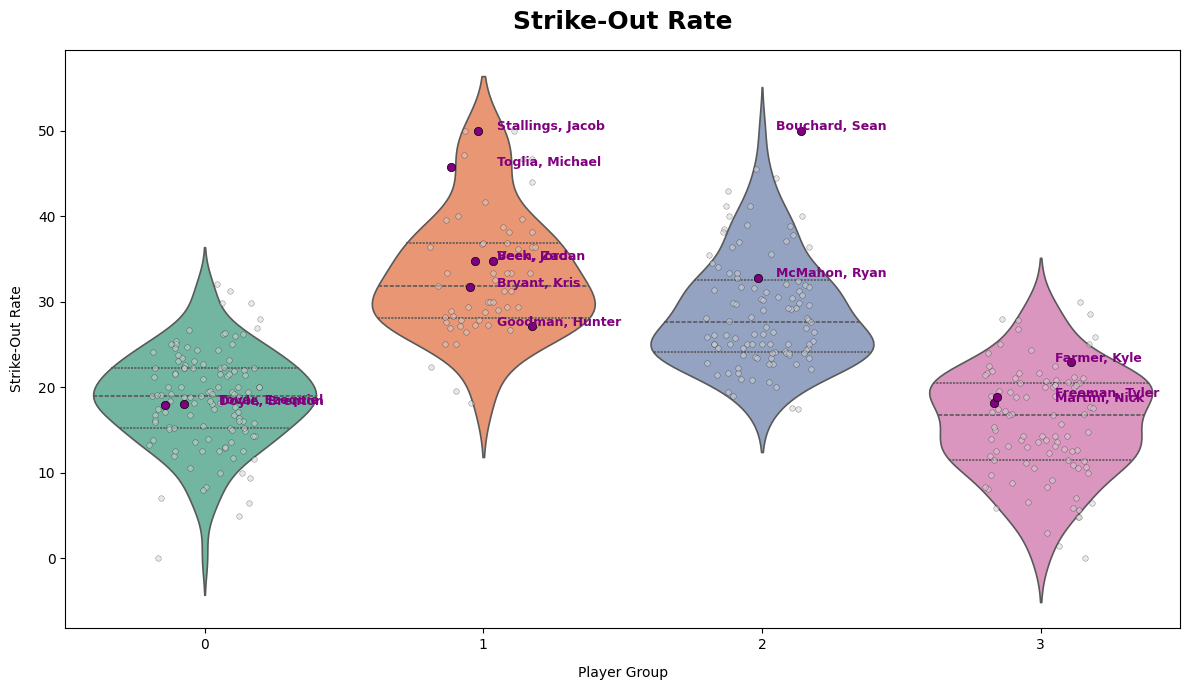

In [ ]:
plt.figure(figsize=(12, 7))
plt.grid(axis='y', visible=False)

feature = "k_percent"

# Violin plot
sns.violinplot(
    data=stats_kmeans,
    x='cluster4',
    y=feature,
    palette='Set2',
    inner='quartile',
    linewidth=1.2
)

# Grey dots = non-Colorado
sns.stripplot(
    data=stats_kmeans[~stats_kmeans['Colorado']],
    x='cluster4',
    y=feature,
    color='lightgray',
    size=4,
    jitter=0.2,
    alpha=0.5,
    edgecolor='black',
    linewidth=0.3
)

# Purple dots = Colorado
sns.stripplot(
    data=col_players,
    x='cluster4',
    y=feature,
    color='purple',
    size=6,
    jitter=0.2,
    edgecolor='black',
    linewidth=0.5
)

# Label Colorado players
for i, row in col_players.iterrows():
    plt.text(
        x=row['cluster4'] + 0.05,
        y=row[feature] + .03,
        s=row['last_name, first_name'],
        fontsize=9,
        color='purple',
        weight='bold'
    )

# Titles + Axes
plt.title('Strike-Out Rate', fontsize=18, weight='bold', pad=15, color='black')
plt.xlabel('Player Group', labelpad=10, color='black')
plt.ylabel('Strike-Out Rate', labelpad=10, color='black')

plt.xticks(color='black')
plt.yticks(color='black')

plt.tight_layout()
plt.show()

<ipython-input-24-8a201ab4941c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


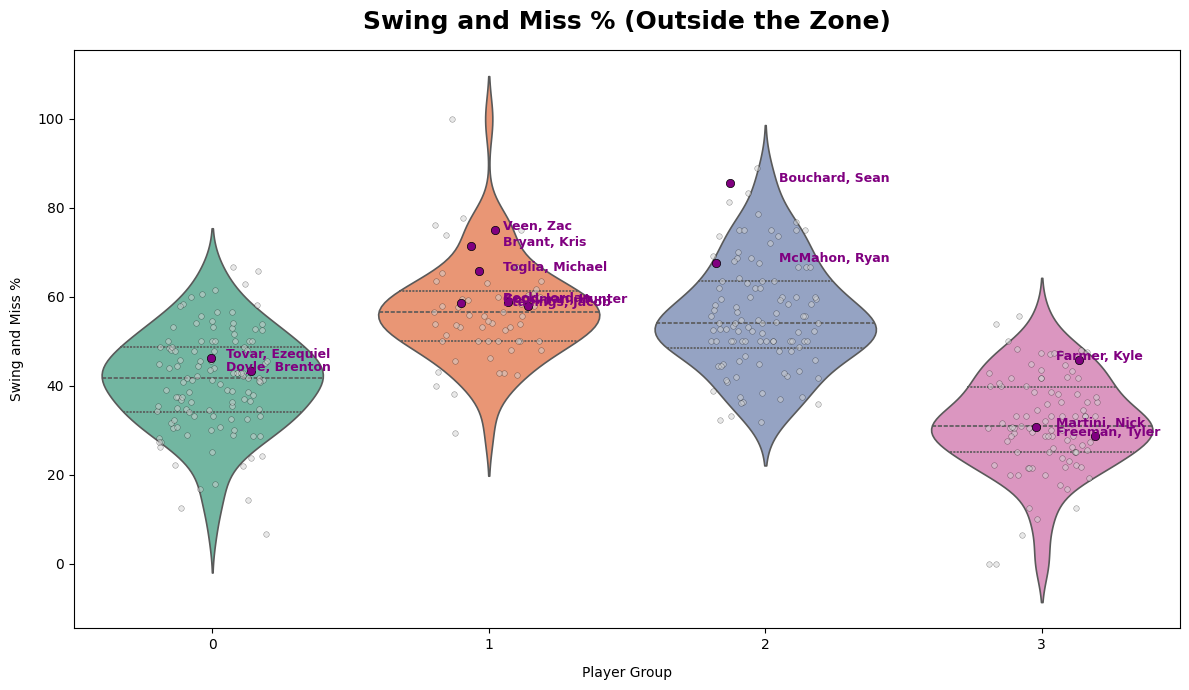

In [ ]:
plt.figure(figsize=(12, 7))
plt.grid(axis='y', visible=False)

feature = "oz_swing_miss_percent"

# Violin plot
sns.violinplot(
    data=stats_kmeans,
    x='cluster4',
    y=feature,
    palette='Set2',
    inner='quartile',
    linewidth=1.2
)

# Grey dots = non-Colorado
sns.stripplot(
    data=stats_kmeans[~stats_kmeans['Colorado']],
    x='cluster4',
    y=feature,
    color='lightgray',
    size=4,
    jitter=0.2,
    alpha=0.5,
    edgecolor='black',
    linewidth=0.3
)

# Purple dots = Colorado
sns.stripplot(
    data=col_players,
    x='cluster4',
    y=feature,
    color='purple',
    size=6,
    jitter=0.2,
    edgecolor='black',
    linewidth=0.5
)

# Label Colorado players
for i, row in col_players.iterrows():
    plt.text(
        x=row['cluster4'] + 0.05,
        y=row[feature] + .03,
        s=row['last_name, first_name'],
        fontsize=9,
        color='purple',
        weight='bold'
    )

# Titles + Axes
plt.title('Swing and Miss % (Outside the Zone)', fontsize=18, weight='bold', pad=15, color='black')
plt.xlabel('Player Group', labelpad=10, color='black')
plt.ylabel('Swing and Miss %', labelpad=10, color='black')

plt.xticks(color='black')
plt.yticks(color='black')

plt.tight_layout()
plt.show()

<ipython-input-23-bd89224847e3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


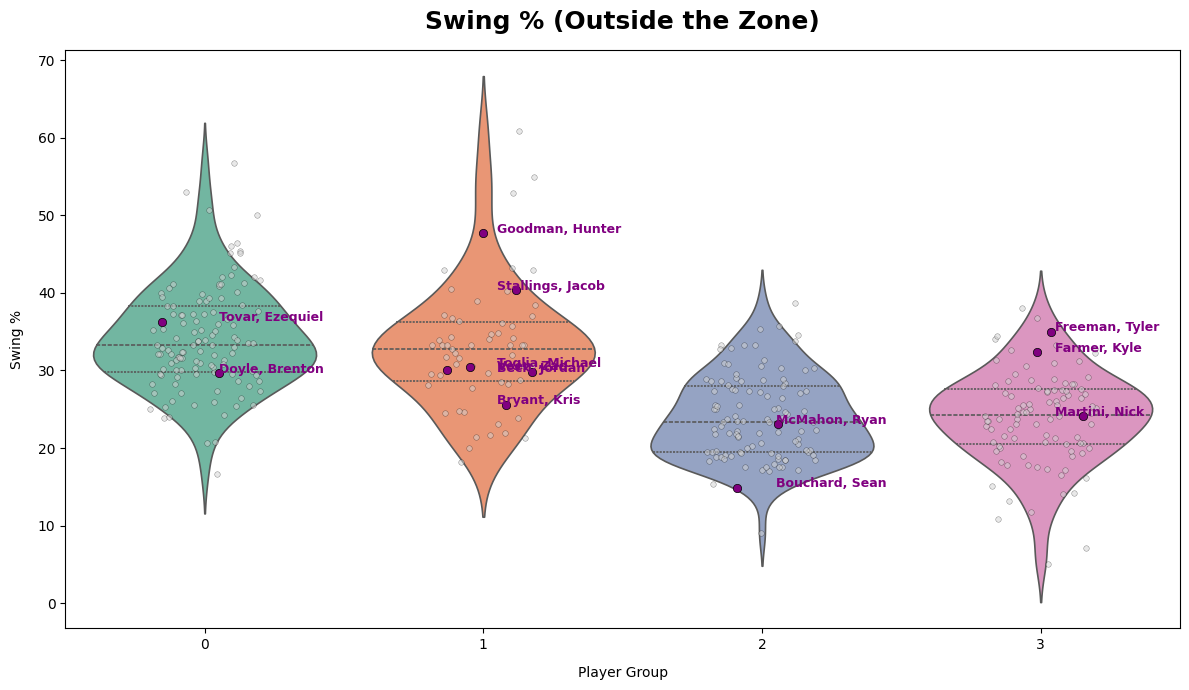

In [ ]:
plt.figure(figsize=(12, 7))
plt.grid(axis='y', visible=False)

feature = "oz_swing_percent"

# Violin plot
sns.violinplot(
    data=stats_kmeans,
    x='cluster4',
    y=feature,
    palette='Set2',
    inner='quartile',
    linewidth=1.2
)

# Grey dots = non-Colorado
sns.stripplot(
    data=stats_kmeans[~stats_kmeans['Colorado']],
    x='cluster4',
    y=feature,
    color='lightgray',
    size=4,
    jitter=0.2,
    alpha=0.5,
    edgecolor='black',
    linewidth=0.3
)

# Purple dots = Colorado
sns.stripplot(
    data=col_players,
    x='cluster4',
    y=feature,
    color='purple',
    size=6,
    jitter=0.2,
    edgecolor='black',
    linewidth=0.5
)

# Label Colorado players
for i, row in col_players.iterrows():
    plt.text(
        x=row['cluster4'] + 0.05,
        y=row[feature] + .03,
        s=row['last_name, first_name'],
        fontsize=9,
        color='purple',
        weight='bold'
    )

# Titles + Axes
plt.title('Swing % (Outside the Zone)', fontsize=18, weight='bold', pad=15, color='black')
plt.xlabel('Player Group', labelpad=10, color='black')
plt.ylabel('Swing %', labelpad=10, color='black')

plt.xticks(color='black')
plt.yticks(color='black')

plt.tight_layout()
plt.show()

<ipython-input-33-0a0e4789cc0a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-33-0a0e4789cc0a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-33-0a0e4789cc0a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-33-0a0e4789cc0a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


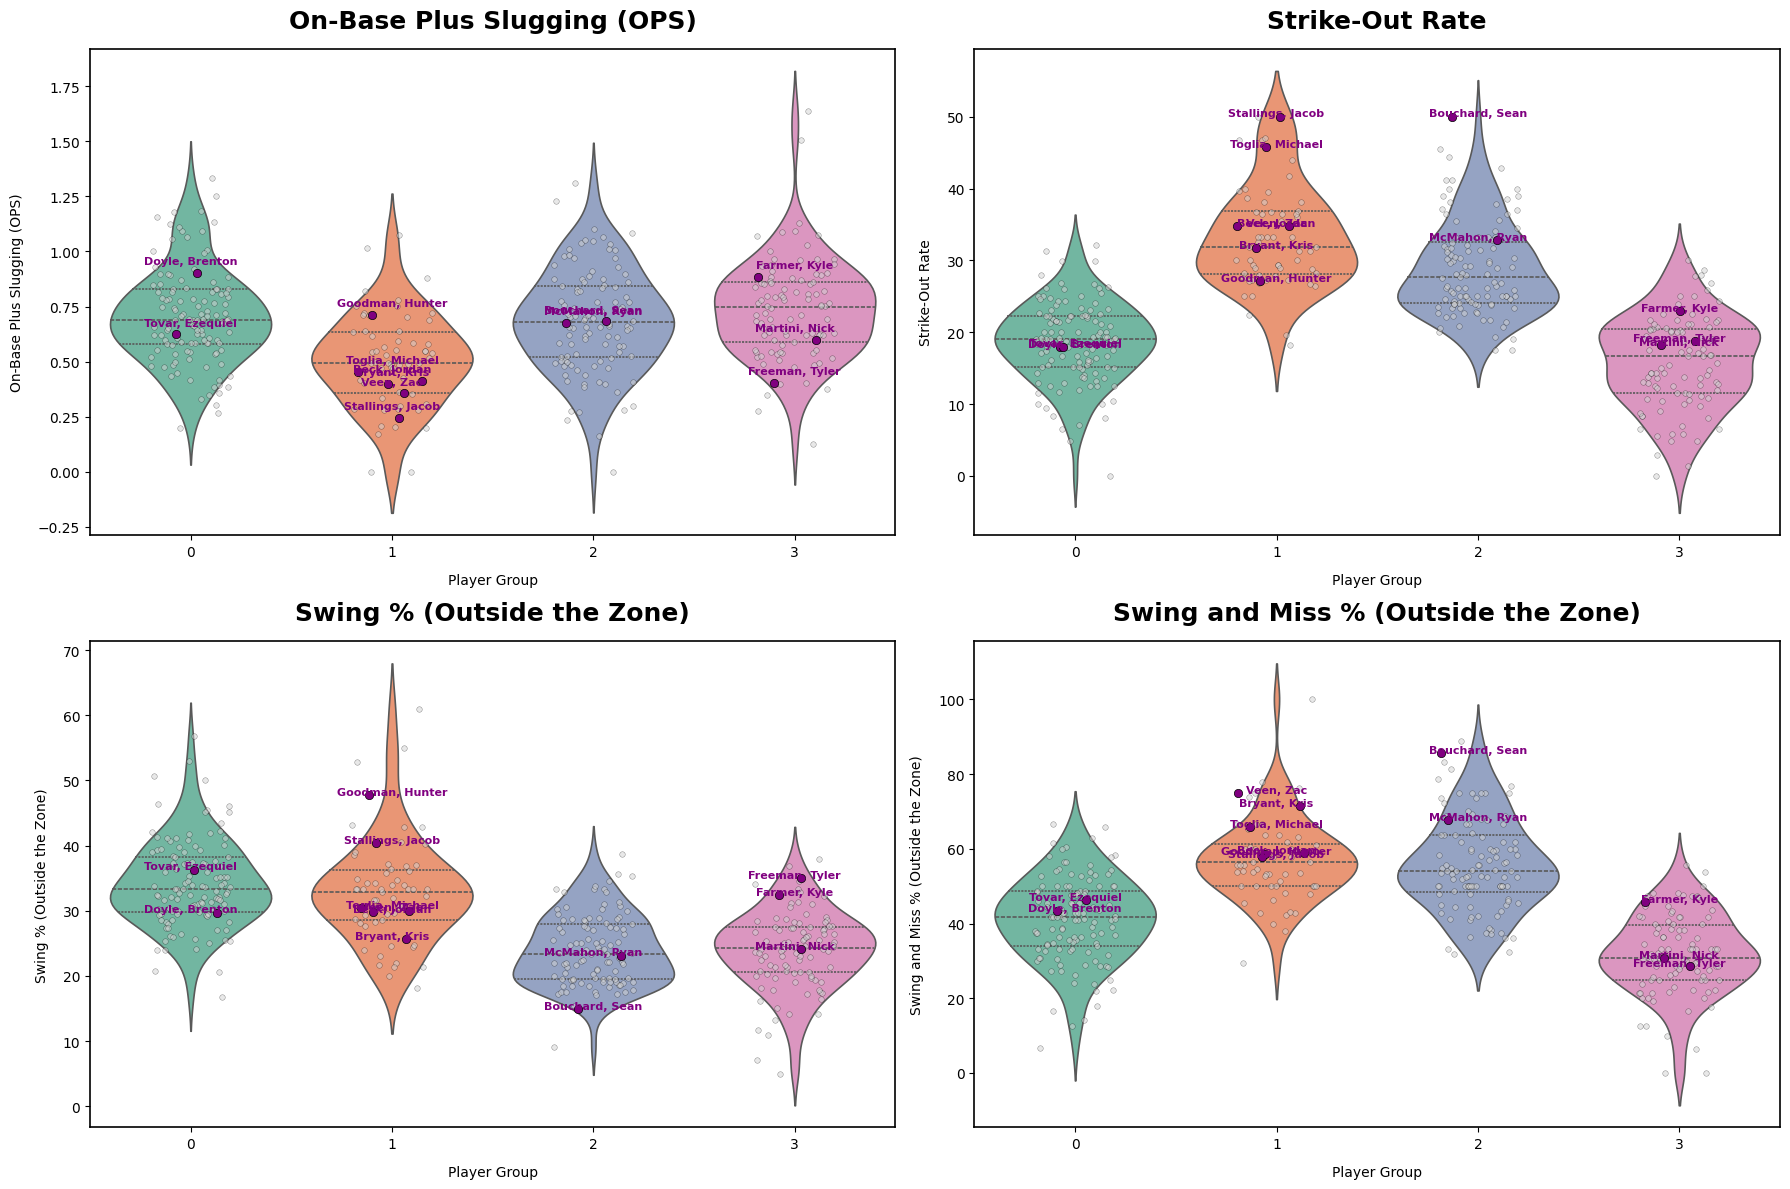

In [ ]:
final_features = ["on_base_plus_slg", "k_percent", "oz_swing_percent", "oz_swing_miss_percent"]

titles = {
    "on_base_plus_slg": "On-Base Plus Slugging (OPS)",
    "k_percent": "Strike-Out Rate",
    "oz_swing_percent": "Swing % (Outside the Zone)",
    "oz_swing_miss_percent": "Swing and Miss % (Outside the Zone)"
}

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

for i, feature in enumerate(final_features):
    ax = axes[i // 2, i % 2]
    sns.violinplot(
        data=stats_kmeans,
        x='cluster4',
        y=feature,
        palette='Set2',
        inner='quartile',
        linewidth=1.2,
        ax=ax
    )
    sns.stripplot(
        data=stats_kmeans[~stats_kmeans['Colorado']],
        x='cluster4',
        y=feature,
        color='lightgray',
        size=4,
        jitter=0.2,
        alpha=0.5,
        edgecolor='black',
        linewidth=0.3,
        ax=ax
    )
    sns.stripplot(
        data=col_players,
        x='cluster4',
        y=feature,
        color='purple',
        size=6,
        jitter=0.2,
        edgecolor='black',
        linewidth=0.5,
        ax=ax
    )
    for _, row in col_players.iterrows():
        ax.text(
            x=row['cluster4'],
            y=row[feature] + 0.04,
            s=row['last_name, first_name'],
            fontsize=8,
            color='purple',
            weight='bold',
            ha='center'
        )

            # Titles + Axes
    ax.set_title(titles[feature], fontsize=18, weight='bold', pad=15, color='black')
    ax.set_xlabel('Player Group', labelpad=10, color='black')
    ax.set_ylabel(titles[feature], labelpad=10, color='black')

    # Customize ticks
    ax.tick_params(axis='both', colors='black')

    # Add black border to the plot
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1.2)

    ax.grid(axis='y', visible=False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()